### Object Detection in the Autonomous Driving Scenario

#### Description
Object Detection in the Autonomous Driving Scenario is a project intended to explore state of the art architectures for real-time multi-object detection for autonomous vehicle detection modules.

#### Team Members
- Anwesan Pal (PID : email.ucsd.edu)
- David Paz-Ruiz (A12871018 : dpazruiz@ucsd.edu)
- Harshini Rajachander (PID: email.ucsd.edu)

#### Code Base: [Repository](https://github.com/AftermathK/ece285-final-project)

### YOLO3

In [1]:
import os
import sys
import time
import cv2
import matplotlib.pyplot as plt
from yolo3_demo.utils import *
from yolo3_demo.darknet import Darknet
from PIL import Image, ImageDraw



def detect_one(cfgfile, weightfile, img):

    m = Darknet(cfgfile)

    #m.print_network()
    m.load_weights(weightfile)
    print('Loading weights from %s... Done!' % (weightfile))

    num_classes = 80
    if num_classes == 20:
        namesfile = 'yolo3/data/voc.names'
    elif num_classes == 80:
        namesfile = 'yolo3/data/coco.names'
    else:
        namesfile = 'yolo3/data/names'

    use_cuda = 0
    if use_cuda:
        m.cuda()
       
    sized = img.resize((m.width, m.height))

    for i in range(2):
        t_start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, use_cuda)
        t_finish = time.time()


    total_time = t_finish-t_start
    class_names = load_class_names(namesfile)
    return plot_boxes(sized, boxes, None, class_names)

def classify_models(cfgfile, weightfile, img):

    m = Darknet(cfgfile)

    #m.print_network()
    m.load_weights(weightfile)

    num_classes = 80
    if num_classes == 20:
        namesfile = 'yolo3/data/voc.names'
    elif num_classes == 80:
        namesfile = 'yolo3/data/coco.names'
    else:
        namesfile = 'yolo3/data/names'

    use_cuda = 1
    if use_cuda:
        m.cuda()
       
    sized = img.resize((m.width, m.height))

    for i in range(2):
        t_start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, use_cuda)
        t_finish = time.time()


    total_time = t_finish-t_start
    class_names = load_class_names(namesfile)
    
    #print(type(boxes))
    #print(boxes)
    return ret_boxes(sized, boxes, None, class_names)

def display_vehicles(vehicle_list):
    for i in range(len(vehicle_list)):
        plt.figure()
        plt.title("Vehicle: " + str(i))
        plt.imshow(vehicle_list[i])

### YOLO3 Classification Tests

Loading weights from yolov3.weights... Done!


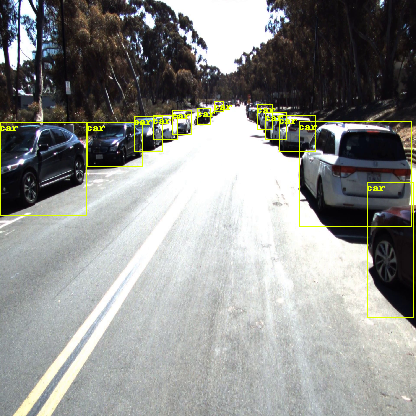

In [12]:
cfg_file = 'yolo3/cfg/yolov3.cfg'
weight_file = 'yolov3.weights'
test_img_one = Image.open("DemoImages/camera6_4208.png").convert('RGB')
test_img_two = Image.open("DemoImages/DifferentModels/1.png").convert('RGB')
test_img_three = Image.open("DemoImages/DifferentModels/2.png").convert('RGB')
test_img_four = Image.open("DemoImages/DifferentModels/3.png").convert('RGB')

detect_one(cfg_file, weight_file, test_img_one)




Loading weights from yolov3.weights... Done!


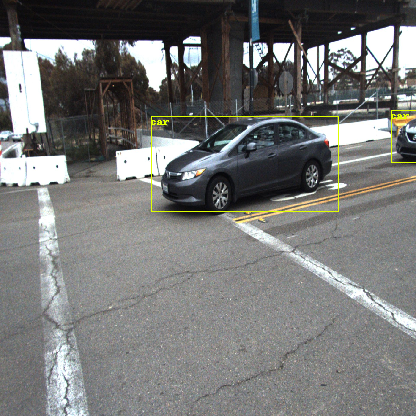

In [13]:
detect_one(cfg_file, weight_file, test_img_two)



Loading weights from yolov3.weights... Done!


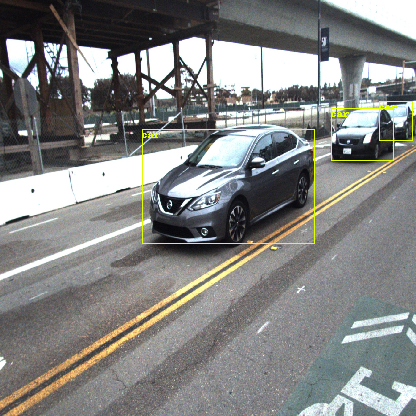

In [14]:
detect_one(cfg_file, weight_file, test_img_three)


Loading weights from yolov3.weights... Done!


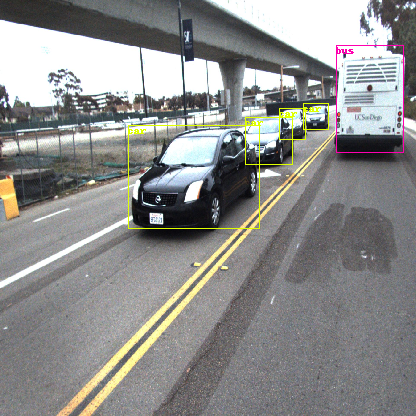

In [15]:

detect_one(cfg_file, weight_file, test_img_four)

### Faster R-CNN

### RetinaNet

### Cascade R-CNN

### Vehicle Model Classification Tests using YOLO3

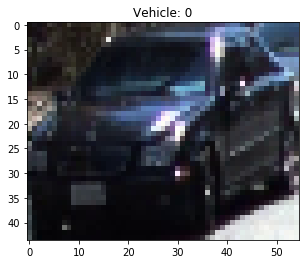

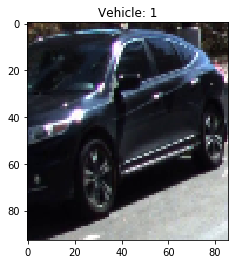

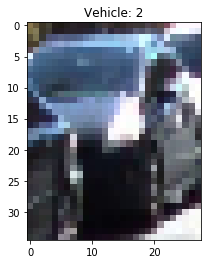

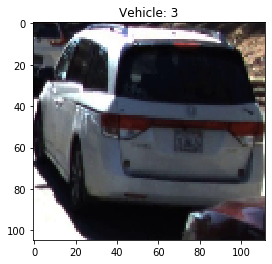

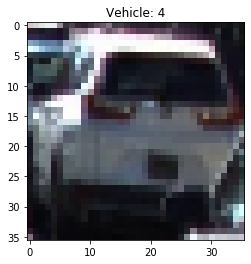

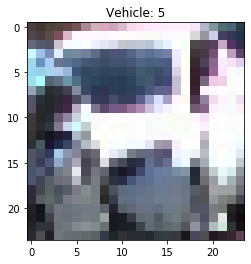

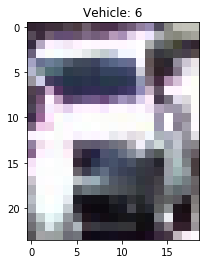

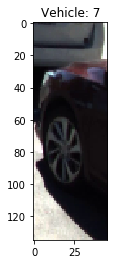

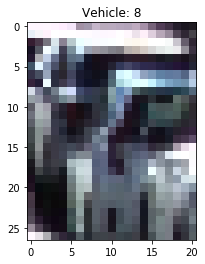

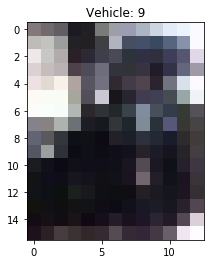

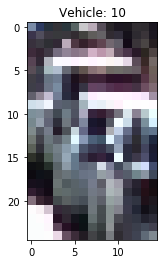

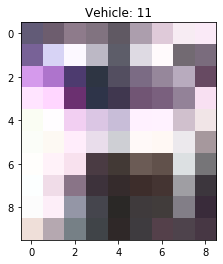

In [16]:
cfg_file = 'yolo3/cfg/yolov3.cfg'
weight_file = 'yolo3/yolov3.weights'
test_img_one = Image.open("DemoImages/camera6_4208.png").convert('RGB')
test_img_two = Image.open("DemoImages/DifferentModels/1.png").convert('RGB')
test_img_three = Image.open("DemoImages/DifferentModels/2.png").convert('RGB')
test_img_four = Image.open("DemoImages/DifferentModels/3.png").convert('RGB')
all_objs = classify_models(cfg_file, weight_file, test_img_one)
display_vehicles(all_objs)


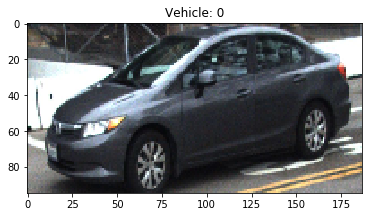

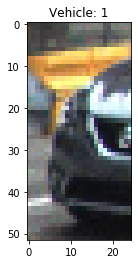

In [17]:
all_objs = classify_models(cfg_file, weight_file, test_img_two)
display_vehicles(all_objs)


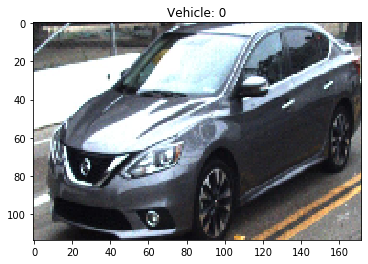

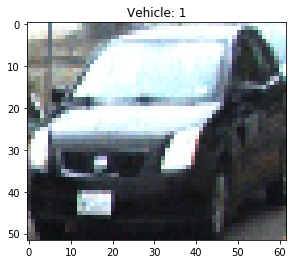

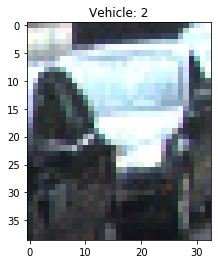

In [18]:
all_objs = classify_models(cfg_file, weight_file, test_img_three)
display_vehicles(all_objs)


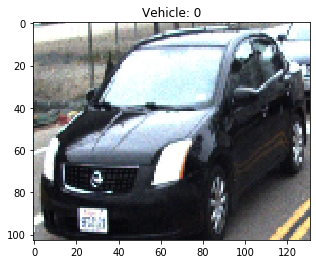

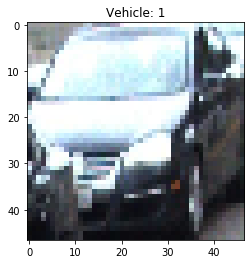

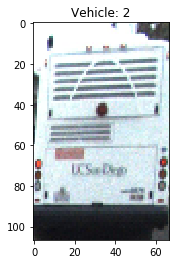

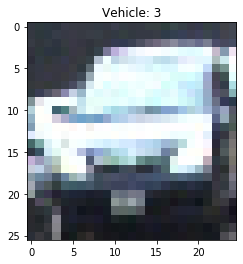

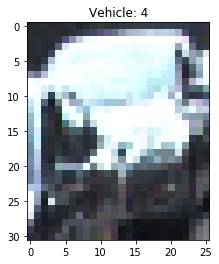

In [19]:
all_objs = classify_models(cfg_file, weight_file, test_img_four)
display_vehicles(all_objs)
